# Interpretation of the Principal Components

Using correlation anaylisis to understand principal components. 
For more informaiton see:https://online.stat.psu.edu/stat505/lesson/11/11.4

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append(r"C:\Users\robal\Dropbox\UChicago\Year II\Quarter I\Mathematical Foundations for ML\FinalProject\InterpretableDimRed")

In [30]:
import numpy as np 
import numpy.linalg as la
from InterpretableDimRed.utils import pca_svd_utils as psa
import pandas as pd
from sklearn.decomposition import PCA
# Update data directory with path to folder in tyour local computer
data_directory = "C:\\Users\\robal\\Dropbox\\UChicago\\Year II\\Quarter I\\Mathematical Foundations for ML\\FinalProject\\InterpretableDimRed\\InterpretableDimRed\\RawData\\"

# Using Dataset 1: Heart Disease Data
For more info on this dataset see: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [12]:
heart_data = pd.read_csv(data_directory + "heartDisease.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
X = heart_data.loc[:,"age":"thal"]

## Step 1 get SVD of feature matrix and plot the spectrum of X

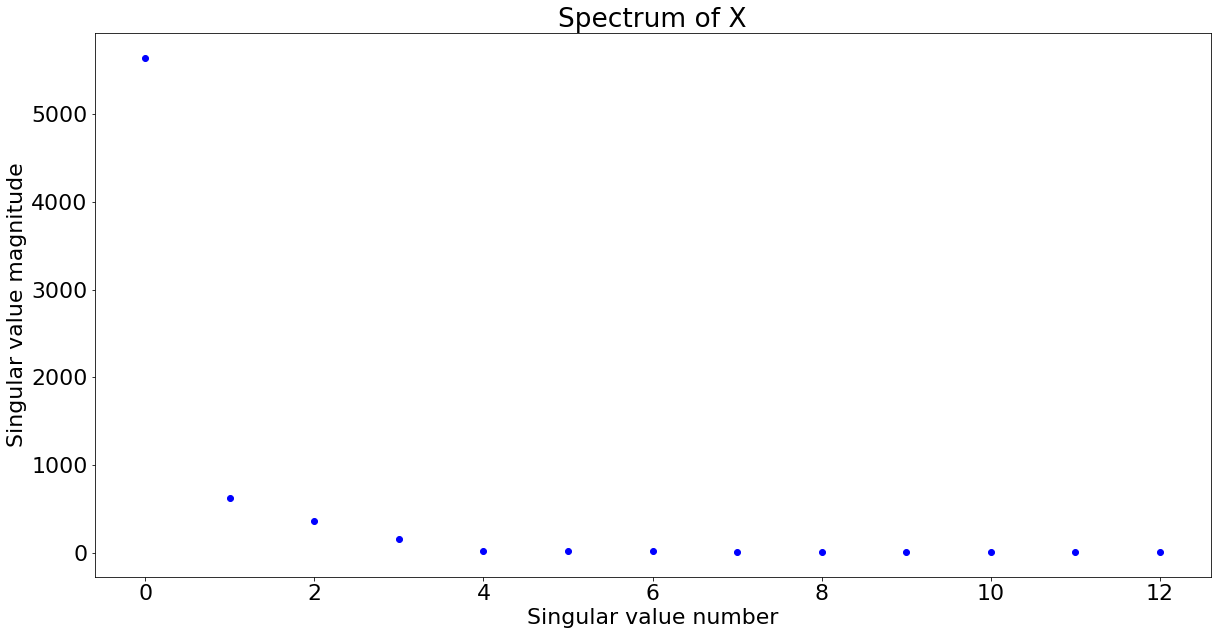

In [20]:
psa.plot_spectrum(X.T)

In [21]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(X.T)
pca.explained_variance_ratio_

array([0.97843604])

We can see from the SVD above that the first singular value is more than 5x larger in magnitude than the second largest singular value. From this plot we can infer that by using dimensionality reduction we could keep much of the  dataset's variance by using only the first principal component. By reducing the original feature Matrix X and using only its first principal component the amount of variance explained is .98

## Step 2: Find correlation between Principal Component Vectors and original feature vectors

In [66]:
X.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [68]:
psa.corr_pc_features(X, pca.components_)

,PC1
age,0.162218
sex,-0.209619
cp,-0.006785
trestbps,0.242194
chol,0.969772
fbs,0.033335
restecg,-0.152385
thalach,0.194577
exang,-0.008679
oldpeak,0.001272


Above we see the correlation for each feature and the firt principal component vector. We can see that cholesterol has the largest correlation with the first principal component.